In [ ]:
# Imports for the sentiment model
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

# Load the test data from the sentiment-topic-test TSV file
df = pd.read_csv("sentiment-topic-test.tsv", sep="\t")

# Create the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# List to store the predicted sentiment labels
predicted_sentiments = []

# Process each sentence in the test data
for sentence in df["sentence"]:
    # Get VADER sentiment scores (positive, negative, neutral, compound)
    score = analyzer.polarity_scores(sentence)
    compound = score["compound"]

    # Convert the compound score into a sentiment label
    if compound > 0.05:
        predicted_sentiments.append("positive")  # Positive sentiment for a score above 0.05
    elif compound < -0.05:
        predicted_sentiments.append("negative")  # Negative sentiment for a score below -0.05
    else:
        predicted_sentiments.append("neutral")   # Neutral sentiment for a score between -0.05 and 0.05

# Add the predicted sentiments to the original DataFrame
df["predicted_sentiment"] = predicted_sentiments

# Print a table comparing the gold and predicted sentiment labels
print(df[["sentence", "sentiment", "predicted_sentiment"]])

# Print a classification report comparing gold and predicted sentiment labels
print("\nClassification Report:")
print(classification_report(df["sentiment"], df["predicted_sentiment"], digits=3))


                                             sentence sentiment  \
0   The stadium was alive with the roar of the cro...  positive   
1   That last-minute goal had me jumping out of my...  positive   
2   I couldn’t put the book down; it swept me into...  positive   
3   The story had its moments, though some parts f...   neutral   
4   I enjoyed the way the timelines shifted, even ...   neutral   
5   Every time I watch this movie, I notice someth...  positive   
6   The movie was a wild ride from start to finish...  positive   
7   Honestly, the team just fell apart in the seco...  negative   
8   No surprise there—the coach rested a few playe...   neutral   
9   The trailer was decent, giving you a taste wit...   neutral   
10  I found the main character so annoying that it...  negative   
11  The author's style feels really genuine, makin...  positive   
12  The movie never really clicked for me; the lea...  negative   
13  Both teams are playing it safe right now, so i...   neutra

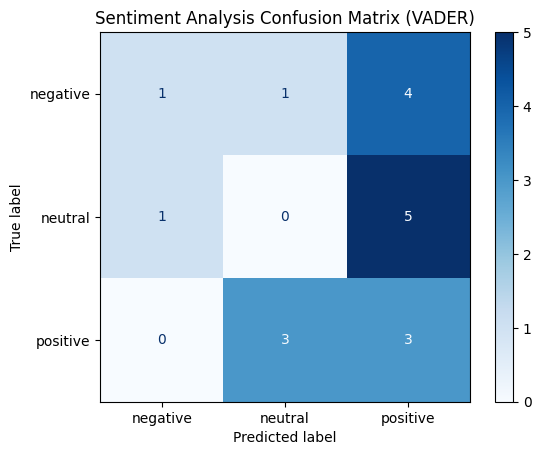

In [2]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix for sentiment predictions
ConfusionMatrixDisplay.from_predictions(
    df["sentiment"], df["predicted_sentiment"], cmap='Blues'
)
plt.title("Sentiment Analysis Confusion Matrix (VADER)")
plt.show()


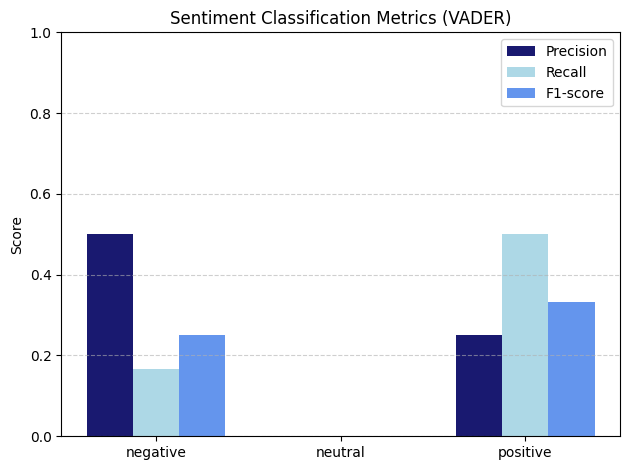

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report = classification_report(df["sentiment"], df["predicted_sentiment"], output_dict=True)

# Select only actual class labels (not 'accuracy' or 'avg')
labels = [label for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, f1 for each label
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1 = [report[label]['f1-score'] for label in labels]

# X-axis positions
x = np.arange(len(labels))
width = 0.25  # width of each bar

# Plot
plt.bar(x - width, precision, width, label='Precision', color='midnightblue')
plt.bar(x, recall, width, label='Recall', color='lightblue')
plt.bar(x + width, f1, width, label='F1-score', color='cornflowerblue')


# Add labels and legend
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Sentiment Classification Metrics (VADER)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
